In [5]:
## STANDARD PYTHON LIBS
import os
import sys
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## ADDING TO ROOT
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), '../../'))
sys.path.append(ROOT_DIR)

## CUSTOM LIBS
import src.utils as utils
import src.model as modellib
from src.config import Config
import src.visualize as visualize

# GPU LIBS
import keras
import tensorflow as tf

cuda_version = os.popen("cat /usr/local/cuda/version.txt ").read()
print ('TF : ', tf.__version__, '  Keras : ', keras.__version__, '  CUDA : ', cuda_version)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


TF :  1.6.0   Keras :  2.1.5   CUDA :  CUDA Version 9.0.176



In [6]:
if 'src.mapillary' in sys.modules : del sys.modules['src.mapillary']
if 'src.utils'     in sys.modules : del sys.modules['src.utils']
if 'src.model'     in sys.modules : del sys.modules['src.model']

import src.utils as utils
import src.model as modellib
import src.mapillary as mapillary

if __name__ == "__main__":
    url_dataset = '/home/play/datasets/open_datasets/mapillary'
    mapillary_mapper = '/home/play/playment/Mask_RCNN/demo/raw/merge__cityscapes_mapillary_v2.json'
    mapillary_config = mapillary.MapillaryConfig(images_per_gpu=16, gpu_count=1)
    print (mapillary_config.BATCH_SIZE)
    trainData = mapillary.MapillaryDataset(url_dataset, mapillary_mapper, mapillary_config, data_type = 'train')
    valData   = mapillary.MapillaryDataset(url_dataset, mapillary_mapper, mapillary_config, data_type = 'val')

16
Mode : train has 17979 images
Mode : val has 2000 images


In [ ]:
import h5py
import time

def create_hdf5(generator, url_dataset, counter):
    print ('Saving in dir : ', url_dataset)
    iters = 0
    while True:
        t0 = time.time()
        url_tmp = os.path.join(url_dataset, '{}.h5'.format(iters))
        data = next(generator)
        if len(data) == 2:
            ip = data[0]
            op = data[1]
        with h5py.File(url_tmp, "w") as hf:
            for i, each in enumerate(ip):
                hf.create_dataset('input_{0}'.format(i), data=each)
            if len(op):
                for i, each in enumerate(op):
                    hf.create_dataset('output_{0}'.format(i), data=each)
            else:
                hf.create_dataset('output'.format(i), data=op)

        print (' -------> Time taken for save : {0} || URL : {1}'.format(round(time.time() - t0,2), iters))
        iters += 1
        if iters > counter:
            break

print ('mapillary_config.BATCH_SIZE : ', mapillary_config.BATCH_SIZE)
train_generator = modellib.data_generator(trainData, mapillary_config, shuffle=True, batch_size=mapillary_config.BATCH_SIZE)
url_dataset_train = '/home/play/datasets/open_datasets/mapillary_hdf5_16/mapillary-vistas-dataset_public_v1.0/training'
if os.path.exists(url_dataset_train):
    create_hdf5(train_generator, url_dataset_train, counter = 2250)

mapillary_config.BATCH_SIZE :  16
Saving in dir :  /home/play/datasets/open_datasets/mapillary_hdf5_16/mapillary-vistas-dataset_public_v1.0/training
 -------> Time taken for save : 113.8 || URL : 0
 ----> Time Taken for one batch 113.79 || Final Index : 15
 -------> Time taken for save : 121.6 || URL : 1
 ----> Time Taken for one batch 121.6 || Final Index : 31
 -------> Time taken for save : 113.2 || URL : 2
 ----> Time Taken for one batch 113.2 || Final Index : 47
 -------> Time taken for save : 79.59 || URL : 3
 ----> Time Taken for one batch 79.59 || Final Index : 63
 -------> Time taken for save : 92.15 || URL : 4
 ----> Time Taken for one batch 92.15 || Final Index : 79
 -------> Time taken for save : 108.83 || URL : 5
 ----> Time Taken for one batch 108.84 || Final Index : 95
 -------> Time taken for save : 108.32 || URL : 6
 ----> Time Taken for one batch 108.32 || Final Index : 111
 -------> Time taken for save : 98.75 || URL : 7
 ----> Time Taken for one batch 98.75 || Final 

ERROR:root:Error processing image {'id': 4128, 'path': '/home/play/datasets/open_datasets/mapillary/mapillary-vistas-dataset_public_v1.0/training/images/KnWRc4spbyohCvDraEEHAA.jpg', 'source': 'mapillary'}
Traceback (most recent call last):
  File "/home/play/playment/Mask_RCNN/src/model.py", line 1650, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/home/play/playment/Mask_RCNN/src/model.py", line 1210, in load_image_gt
    mask = utils.resize_mask(mask, scale, padding)
  File "/home/play/playment/Mask_RCNN/src/utils.py", line 458, in resize_mask
    h, w = mask.shape[:2]
AttributeError: 'list' object has no attribute 'shape'


 -------> Time taken for save : 134.93 || URL : 77
 ----> Time Taken for one batch 134.93 || Final Index : 1248
 -------> Time taken for save : 121.5 || URL : 78
 ----> Time Taken for one batch 121.5 || Final Index : 1264
 -------> Time taken for save : 85.07 || URL : 79
 ----> Time Taken for one batch 85.07 || Final Index : 1280
 -------> Time taken for save : 113.08 || URL : 80
 ----> Time Taken for one batch 113.08 || Final Index : 1296
 -------> Time taken for save : 121.56 || URL : 81
 ----> Time Taken for one batch 121.56 || Final Index : 1312
 -------> Time taken for save : 95.46 || URL : 82
 ----> Time Taken for one batch 95.46 || Final Index : 1328
 -------> Time taken for save : 129.12 || URL : 83
 ----> Time Taken for one batch 129.12 || Final Index : 1344
 -------> Time taken for save : 93.56 || URL : 84
 ----> Time Taken for one batch 93.56 || Final Index : 1360
 -------> Time taken for save : 141.05 || URL : 85
 ----> Time Taken for one batch 141.05 || Final Index : 1376


# MERGE .h5 files

In [114]:
url_dataset_train = '/home/ubuntu/datasets/open_datasets/mapillary_hdf5_16/mapillary-vistas-dataset_public_v1.0/training'
url_dataset_save  = '/home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training'

idx_read, idx_save = 0, 0
blobs_set_64      = []
blobsize_original = 16
blobsize_target   = 64
blobsize_iters    = blobsize_target//blobsize_original

if os.path.exists(url_dataset_train) and os.path.exists(url_dataset_save):
    files = os.listdir(url_dataset_train)
    for path_iter, file in enumerate(files):
        # 1. EXTRACT FILE
        url_tmp_read = os.path.join(url_dataset_train, file)
        with h5py.File(url_tmp_read, "r") as hf:
            ip, op = [], []
            for name in hf:
                if 'input' in name:
                    ip.append(np.array(hf.get(name)))
        blobs_set_64.append(ip)
        idx_read += 1
        
        # 2. process a bunch of files
        if idx_read % (blobsize_iters) == 0: #gathered 64 items
            res = [[] for k in range(len(blobs_set_64[0]))]
            for i in range(len(res)):
                res_tmp = []
                for blob in blobs_set_64:
                    res[i].extend(blob[i])
                res[i] = np.array(res[i])
            
            #for res_tmp in res:
            #    print (res_tmp.shape)
            
            # 2.1 STORE THIS
            url_tmp_save = os.path.join(url_dataset_save, '{0}.h5'.format(idx_save))
            print ('------> URL : ', url_tmp_save, ' Iter : ', path_iter, '/', len(files))
            with h5py.File(url_tmp_save, "w") as hf:
                for i, each in enumerate(res):
                    hf.create_dataset('input_{0}'.format(i), data=each)
                hf.create_dataset('output'.format(i), data=[])
                
            idx_read =  0
            idx_save += 1 
            blobs_set_64 = []

------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/0.h5  Iter :  3 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/1.h5  Iter :  7 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/2.h5  Iter :  11 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/3.h5  Iter :  15 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/4.h5  Iter :  19 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/5.h5  Iter :  23 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/6.h5  Iter :  27 / 1233
------> URL :  /home/ubuntu/d

------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/59.h5  Iter :  239 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/60.h5  Iter :  243 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/61.h5  Iter :  247 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/62.h5  Iter :  251 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/63.h5  Iter :  255 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/64.h5  Iter :  259 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/65.h5  Iter :  263 / 1233
------> URL :

------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/117.h5  Iter :  471 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/118.h5  Iter :  475 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/119.h5  Iter :  479 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/120.h5  Iter :  483 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/121.h5  Iter :  487 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/122.h5  Iter :  491 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/123.h5  Iter :  495 / 1233
------

------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/175.h5  Iter :  703 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/176.h5  Iter :  707 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/177.h5  Iter :  711 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/178.h5  Iter :  715 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/179.h5  Iter :  719 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/180.h5  Iter :  723 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/181.h5  Iter :  727 / 1233
------

------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/233.h5  Iter :  935 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/234.h5  Iter :  939 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/235.h5  Iter :  943 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/236.h5  Iter :  947 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/237.h5  Iter :  951 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/238.h5  Iter :  955 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/239.h5  Iter :  959 / 1233
------

------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/291.h5  Iter :  1167 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/292.h5  Iter :  1171 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/293.h5  Iter :  1175 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/294.h5  Iter :  1179 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/295.h5  Iter :  1183 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/296.h5  Iter :  1187 / 1233
------> URL :  /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/297.h5  Iter :  1191 / 1233

In [101]:
url_tmp = os.path.join(url_dataset_save, '0.h5')
ip_tmp = []
with h5py.File(url_tmp, "r") as hf:
    ip, op = [], []
    for name in hf:
        if 'input' in name:
            tmp = np.array(hf.get(name))
            ip_tmp.append(tmp)

(64, 56, 56, 100) (56, 56, 100)
Class :  1


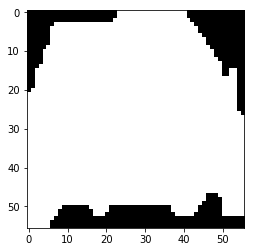

In [112]:
masks = ip_tmp[6]
image_id = 51 # max - 64
mask_id  = 2  # max - 100
print (masks.shape, masks[image_id].shape)
print ('Class : ', ip_tmp[4][image_id][mask_id])
plt.imshow(masks[image_id][:,:,mask_id], cmap = 'gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Images :  (64, 512, 512, 3)


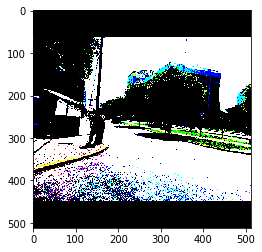

In [58]:
images = ip_tmp[0]
print ('Images : ', images.shape)
plt.imshow(images[0])

# GENERATOR

In [7]:
def data_generator(url_dataset):
    if os.path.exists(url_dataset):
        while True:
            for each in os.listdir(url_dataset):
                url_tmp = os.path.join(url_dataset_train, each)
                ip, op = [], []
                print ('-->', url_tmp)
                with h5py.File(url_tmp, "r") as hf:
                    ip, op = [], []
                    for name in hf:
                        if 'input' in name:
                            ip.append(np.array(hf.get(name)))
                        elif 'output' in name:
                            op.append(np.array(hf.get(name)))
                yield ip, op[0]
    else:
        print ('url_dataset issue : ', url_dataset)

url_dataset_train = '/home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training'
# url_dataset_train = '/home/ubuntu/datasets/open_datasets/mapillary_hdf5_16_safecopy/mapillary-vistas-dataset_public_v1.0/training'
gen = data_generator(url_dataset_train)
print (gen)

<generator object data_generator at 0x7fea2168d4c0>


In [6]:
%%timeit
ip, op = next(gen)

StopIteration: 

In [10]:
%%timeit
ip, op = next(gen)
input_names = ['input_image', 'input_image_meta', 'input_rpn_match', 'input_rpn_bbox', 'input_gt_class_ids', 'input_gt_boxes', 'input_gt_masks']
print ('Batch Size : ', len(ip[0]))
for i, each in enumerate(ip):
    tmp = tf.split(each, 4)
    print (input_names[i], '\t',each.shape, each.dtype)

--> /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/290.h5
Batch Size :  64
input_image 	 (64, 512, 512, 3) float32
input_image_meta 	 (64, 23) int64
input_rpn_match 	 (64, 65472, 1) int32
input_rpn_bbox 	 (64, 256, 4) float64
input_gt_class_ids 	 (64, 100) int32
input_gt_boxes 	 (64, 100, 4) int32
input_gt_masks 	 (64, 56, 56, 100) float64
--> /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/175.h5
Batch Size :  64
input_image 	 (64, 512, 512, 3) float32
input_image_meta 	 (64, 23) int64
input_rpn_match 	 (64, 65472, 1) int32
input_rpn_bbox 	 (64, 256, 4) float64
input_gt_class_ids 	 (64, 100) int32
input_gt_boxes 	 (64, 100, 4) int32
input_gt_masks 	 (64, 56, 56, 100) float64
--> /home/ubuntu/datasets/open_datasets/mapillary_hdf5_64/mapillary-vistas-dataset_public_v1.0/training/127.h5
Batch Size :  64
input_image 	 (64, 512, 512, 3) float32
input_image_meta 	 (64, 23) int64
input_rp

(16, 56, 56, 100) (56, 56, 100)
Class :  1
(56, 100)


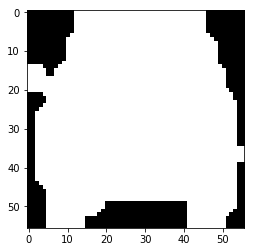

In [97]:
masks = ip[6]
image_id = 10 # max - 16
mask_id  = 2  # max - 100
print (masks.shape, masks[image_id].shape)
print ('Class : ', ip[4][image_id][mask_id])
plt.imshow(masks[image_id][:,:,mask_id], cmap = 'gray')

print (masks[image_id][::,mask_id].shape)

In [93]:
a = np.zeros((10,10,99))

In [96]:
a[:,:,3].shape

(10, 10)